#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 7**
###**Red Neuronal Artificial - Perceptrón Multicapa : Multilayer Perceptrón (MLP)**


**Nombres y matrículas de los integrantes del equipo:**

*  Alexis Hernández Martínez - A01016308 
*   
*   
*   
*   


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [1]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split 

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector

from sklearn.dummy import DummyClassifier 

from sklearn.dummy import DummyRegressor
from sklearn.neural_network import MLPRegressor


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import fbeta_score, make_scorer
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import PowerTransformer

from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import RepeatedKFold

from sklearn.linear_model import LinearRegression


#**Ejercicio-1.** 

1. En esta tarea considera únicamente la siguiente variable de salida que se concluye que es una de las mejores en el artículo antes citado: ‘Lifetime People who have liked a Page and engaged with a post'. Renombra dicha variable como “LPE” . Como variables de entrada selecciona las 7 variables que indican los autores en la Tabla 3 del artículo citado.

In [2]:
#Se crea el dataframe respectivo y se hace la lectura de los primeros 5 renglones para verificar que todo OK

#input = 'pon tu liga'
input = '/Users/alexishema/Downloads/Facebook_metrics/dataset_Facebook.csv'
facebook = pd.read_csv(input,sep=';')
facebook.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [3]:
# Se hace un diccionario para el cambio de nombre de columna a LPE

cambio = {'Lifetime People who have liked your Page and engaged with your post': 'LPE'}

facebook.rename(columns=cambio,inplace=True)


# Se definen X y Y como las variables de entrada y salida, respectivamente solicitadas de acuerdo a Tabla 3

Y = facebook['LPE']
variables_entrada = facebook[['Category','Page total likes', 'Type', 'Post Month',
                              'Post Hour','Post Weekday','Paid']]

X = variables_entrada.copy()
X


,Category,Page total likes,Type,Post Month,Post Hour,Post Weekday,Paid
0,2,139441,Photo,12,3,4,0.0
1,2,139441,Status,12,10,3,0.0
2,3,139441,Photo,12,3,3,0.0
3,2,139441,Photo,12,10,2,1.0
4,2,139441,Photo,12,3,2,0.0
...,...,...,...,...,...,...,...
495,3,85093,Photo,1,2,7,0.0
496,2,81370,Photo,1,8,5,0.0
497,1,81370,Photo,1,2,5,0.0
498,3,81370,Photo,1,11,4,0.0


#**Ejercicio-2.**

2. Realiza una partición de los datos con 100 datos de Prueba y el resto para entrenamiento y validación.

In [4]:
# Se realiza la partición

X_tv, X_test, Y_tv, Y_test = train_test_split(X, Y, test_size=.20, shuffle=True, random_state=0)

print('Tamaño del conjunto de entrenamiento:', X_tv.shape)
print('Tamaño del conjunto de prueba', X_test.shape)

print('Tamaño del conjunto de entrenamiento:', Y_tv.shape)
print('Tamaño del conjunto de prueba', Y_test.shape)

Tamaño del conjunto de entrenamiento: (400, 7)
Tamaño del conjunto de prueba (100, 7)
Tamaño del conjunto de entrenamiento: (400,)
Tamaño del conjunto de prueba (100,)


#**Ejercicio-3.**

3. Definirás tus propias funciones de errores para este problema de regresión. Los errores que utilizarás son la raíz cuadrada del error cuadrático medio RMSE, el error absoluto medio MAE y el error porcentual absoluto medio MAPE.

In [5]:
def mi_RMSE(Yreal, Ypronosticado):
    
    return (np.mean(np.square(np.subtract(Yreal,Ypronosticado))))**(1/2)

def mi_MAE(Yreal, Ypronosticado):

    return (np.mean(np.abs(Yreal- Ypronosticado)))

def mi_MAPE(Yreal, Ypronosticado):
    
    return (np.mean(np.abs(((Yreal-Ypronosticado)/Yreal))))*100

#**Ejercicio-4.**

4. En la página de la UCI, así como en el artículo de los autores previamente citado encuentras información en relación al significado de cada variable. Haz una análisis de tus datos y lleva a cabo las transformaciones que consideres adecuadas tanto en los datos de entrada, como en las de salida. Utiliza un Pipeline para evitar el filtrado de información.

In [6]:
# Se comprueba que hay datos faltantes en las columnas de Paid, no en el DT de facebook pero en X_tv y en Y

print('Datos de entrada\n',X.isna().any())
print('\nDatos de salida\n',Y.isna().any())

Datos de entrada
 Category            False
Page total likes    False
Type                False
Post Month          False
Post Hour           False
Post Weekday        False
Paid                 True
dtype: bool

Datos de salida
 False


In [7]:
# Se procede a crear el Pipe para reemplazar los valores faltantes 

# Transformaciones a factores numéricos de entrada:
facebookX_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')), 
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2)))])  
facebookX_pipeline_nombres = ['Category', 'Page total likes','Post Month','Post Hour',
                              'Post Weekday','Paid']

# Transformaciones a factor tipo objeto de entrada:
facebookXOHE_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')), 
                               ('onehot', OneHotEncoder(handle_unknown='ignore'))])  
facebookXOHE_pipeline_nombres = ['Type']


# Transformaciones a factor tipo objeto de entrada:
facebookY_pipeline = Pipeline(steps = [('escalaNum', MinMaxScaler(feature_range=(1,2)))]) 
facebookY_pipeline_nombres = ['LPE']



CT = ColumnTransformer(transformers = [('facebookX_pipe', facebookX_pipeline, facebookX_pipeline_nombres),
                                      ('facebookXOHE_pipe', facebookXOHE_pipeline,facebookXOHE_pipeline_nombres),
                                      ])

CTY = ColumnTransformer(transformers = [('facebookY_pipe', facebookY_pipeline, facebookY_pipeline_nombres)
                                      ])





# Solo comprobamos que si se hagan las transformaciones, en ambos splits por separado para evitar
# que se contaminen

#X_tv_Fit= CT.fit(X_tv)
#X_tv_Transf= X_tv_Fit.transform(X_tv)


#X_test_Fit= CT.fit(X_test)
#X_test_Transf= X_test_Fit.transform(X_test)


In [8]:
# En este punto se verifica si hay valores nulos, y el tipo de variable que cada columna tiene

print(X.info())
print(Y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          500 non-null    int64  
 1   Page total likes  500 non-null    int64  
 2   Type              500 non-null    object 
 3   Post Month        500 non-null    int64  
 4   Post Hour         500 non-null    int64  
 5   Post Weekday      500 non-null    int64  
 6   Paid              499 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 27.5+ KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 500 entries, 0 to 499
Series name: LPE
Non-Null Count  Dtype
--------------  -----
500 non-null    int64
dtypes: int64(1)
memory usage: 4.0 KB
None


In [9]:
# Análisis de valores por cada una de las variables de entrada

print('En esta sección se analiza los valores que cada columna trae para ver si son coherentes\n')
for x in range(0,7):
    c=X.columns[x]
    A=str(c)
    print("Para la variable", c,"hay\n",X[A].value_counts(),"\n")
    
print("Para la variable", Y.name,"hay\n",Y.value_counts(),"\n")
print("Aquí termina el análisis por variable")

En esta sección se analiza los valores que cada columna trae para ver si son coherentes

Para la variable Category hay
 1    215
3    155
2    130
Name: Category, dtype: int64 

Para la variable Page total likes hay
 136393    18
124940    17
129600    15
139441    14
138895    14
          ..
93470      1
127082     1
93684      1
133451     1
93577      1
Name: Page total likes, Length: 90, dtype: int64 

Para la variable Type hay
 Photo     426
Status     45
Link       22
Video       7
Name: Type, dtype: int64 

Para la variable Post Month hay
 10    60
7     52
12    50
4     50
6     49
11    45
5     37
9     36
3     36
8     34
2     26
1     25
Name: Post Month, dtype: int64 

Para la variable Post Hour hay
 3     105
10     78
13     52
11     44
2      39
4      35
9      30
12     29
6      16
7      13
5      13
14     13
8      12
15      6
1       4
18      3
17      3
23      1
22      1
20      1
19      1
16      1
Name: Post Hour, dtype: int64 

Para la variable Post

In [10]:
Y.describe()

count     500.000000
mean      609.986000
std       612.725618
min         9.000000
25%       291.000000
50%       412.000000
75%       656.250000
max      4376.000000
Name: LPE, dtype: float64

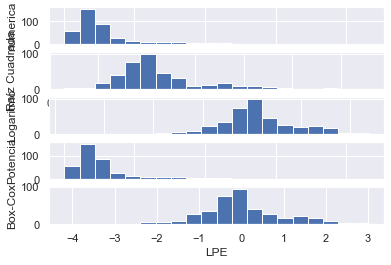

In [11]:
numerica = ['LPE']
sns.set(rc={'figure.figsize':(5,10)})
#Numerica
k=0
fig, axes = plt.subplots(5, 1)   
for k in range(0,1):  
  plt.subplot(5,1,k+1) 
#.iloc[:,k]
  Transf0 = Y_tv.to_numpy().reshape(-1, 1)  
  plt.hist(Transf0, bins=20) 
  plt.xlabel(numerica[k])
  if k==0:
    plt.ylabel('numerica')
  
  plt.subplot(5,1,k+2)    
  Transf1 = np.sqrt(Transf0)       
  plt.hist(Transf1, bins=20)                      
  if k==0:
    plt.ylabel('Raíz Cuadrada')

  plt.subplot(5,1,k+3)    
  Transf2 = np.log(Transf0)       
  plt.hist(Transf2, bins=20)                      
  plt.xlabel(numerica[k])
  if k==0:
    plt.ylabel('Logaritmo')

  plt.subplot(5,1,k+4)    
  Transf3 = np.exp(Transf2)
  plt.hist(Transf3, bins=20)      
  plt.xlabel(numerica[k])
  if k==0:
    plt.ylabel('Potencia')
  
  plt.subplot(5,1,k+5)
  Transf4 = power_transform(Y_tv.to_numpy().reshape(-1, 1), method='box-cox')        
  plt.hist(Transf4, bins=20)                  
  plt.xlabel(numerica[k])
  if k==0:
   plt.ylabel('Box-Cox')

Derivado del análisis de gráficas, se concluye que la transformación con logaritmo es la que mejor le quita el sesgo a los datos de Y de entrenamiento, por lo que a continuación se definen las correspondientes funciones de transformación de datos, y la que se necesita para regresar a los datos de Y originales.

In [12]:

def y_Transform(Y):
  y_transform = Y.copy() 
  y_transform = np.log(y_transform)
  return y_transform

def y_antiTransform(Y):
  y_antitransform = Y.copy() 
  y_antitransform = np.exp(y_antitransform)
  return y_antitransform

#**Ejercicio-5.**

5. Utiliza la función Dummy para modelos de regresión de scikit-learn con el conjunto que tienes de datos de entrenamiento y validación. Para ello particiónalos en 100 para validación y 300 para entrenamiento. Encuentra los errores RMSE, MAE y MAPE para los conjuntos de entrenamiento y validación. Estos serán tus errores máximos que deberás tomar como referencia en el resto de la actividad. 

In [13]:
# Usar X_tv y Y_tv pues así lo pide el ejercicio

Xtrain5, Xval5, Ytrain5, Yval5 = train_test_split(X_tv, Y_tv, train_size=0.75, random_state=0)


modeloD = DummyRegressor(strategy='median')    
                                                       

pipeline = Pipeline(steps=[('CT',CT),('model',modeloD)])

modeloDummy = TransformedTargetRegressor(regressor=pipeline, 
                                    func= y_Transform,     
                                    inverse_func=y_antiTransform    
                                    )            
    
modeloDummy.fit(Xtrain5, Ytrain5)       # entrenamos con los conjuntos de entrenamiento

Yhat = modeloDummy.predict(Xval5) 
Yhat2 = modeloDummy.predict(Xtrain5) 

print("Errores máximos como referencia para validación\n")
print("El error RMSE es:",mi_RMSE(Yval5, Yhat))
print("El error MAE es:",mi_MAE(Yval5, Yhat))
print("El error MAPE es:",mi_MAPE(Yval5, Yhat),'\n')

print("Errores máximos como referencia para entrenamiento\n")
print("El error RMSE es:",mi_RMSE(Ytrain5, Yhat2))
print("El error MAE es:",mi_MAE(Ytrain5, Yhat2))
print("El error MAPE es:",mi_MAPE(Ytrain5, Yhat2))
    

Errores máximos como referencia para validación

El error RMSE es: 716.0021997172914
El error MAE es: 375.07
El error MAPE es: 121.40708156004855 

Errores máximos como referencia para entrenamiento

El error RMSE es: 598.3394939330012
El error MAE es: 330.5233333333333
El error MAPE es: 73.70538459809016


#**Ejercicio-6.**

6. Usando los modelos de regresión lineal múltiple, el bosque aleatorio y el perceptrón multicapa con sus valores predeterminados, lleva a cabo su entrenamiento con repeticiones de validación cruzada (RepeatedKFold) y desplegando los errores RMSE, MAE y MAPE. Recuerda evitar el filtrado de información usando los datos que obtuviste en el ejercicio 2. Incluye las conclusiones sobre el mejor modelo encontrado en esta primera aproximación. En particular ¿hay alguno sobreentrenado o subentrenado? NOTA: Recuerda que puedes aumentar en dado caso el número máximo de iteraciones para que todos los modelos converjan.


In [14]:
#Definimos los tres modelos que vamos a utilizar

def get_models():
  modelos = list()
  nombres = list()

  # LR - Regresión Logística:
  modelos.append(LinearRegression())
  nombres.append('LR')

  # RFC - andom Forest / Bosque Aleatorio:
  modelos.append(RandomForestRegressor())
  nombres.append('RFC')
  
  # MLP - MLPRegressor / Perceptrón Multicapa:  
  modelos.append(MLPRegressor(max_iter=10000))
  nombres.append('MLP')

  return modelos, nombres

In [15]:
# X_tv, X_test, Y_tv, Y_test

modelos, nombres = get_models() 

scores_3d=list()

for i in range(len(modelos)):
  
  pipeline = Pipeline(steps=[('CT',CT),('m',modelos[i])])
    
  modelo = TransformedTargetRegressor(regressor=pipeline, 
                                    func= y_Transform,     
                                    inverse_func=y_antiTransform   
                                    )


  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=7)
  mismetricas_ = {'RMSE':make_scorer(mi_RMSE), 'MAE':make_scorer(mi_MAE), 
                  'MAPE':make_scorer(mi_MAPE)}    


    
  resultadosOU = cross_validate(modelo, 
                          X_tv, np.ravel(Y_tv),
                          scoring=mismetricas_,
                          cv=cv,
                          return_train_score=True)
    
  scores_3d.append(resultadosOU) 


  print("Para los datos de test")
  print('%s:\nmean RMSE: %.3f (%.4f)\nmean MAE: %.3f (%.4f)\nmean MAPE: %.3f (%.4f)\n' % (nombres[i],
                                            np.mean(resultadosOU['test_RMSE']),
                                            np.std(resultadosOU['test_RMSE']), 
                                            np.mean(resultadosOU['test_MAE']),
                                            np.std(resultadosOU['test_MAE']), 
                                            np.mean(resultadosOU['test_MAPE']),
                                            np.std(resultadosOU['test_MAPE']), 
                                            ))

Para los datos de test
LR:
mean RMSE: 499.342 (158.6351)
mean MAE: 277.422 (70.6726)
mean MAPE: 77.398 (54.8534)

Para los datos de test
RFC:
mean RMSE: 510.555 (150.9391)
mean MAE: 296.845 (64.7743)
mean MAPE: 79.426 (52.1062)

Para los datos de test
MLP:
mean RMSE: 534.469 (164.5619)
mean MAE: 327.079 (84.9794)
mean MAPE: 87.557 (49.4326)



#**Ejercicio-7.**

7. Obtener los diagramas de caja y bigote para los errores MAPE de los conjuntos de validación obtenidos. En particular compara estos primeros resultados de MAPE con el mejor resultado que encuentran los autores del artículo citado al inicio. Incluye tus conclusiones.

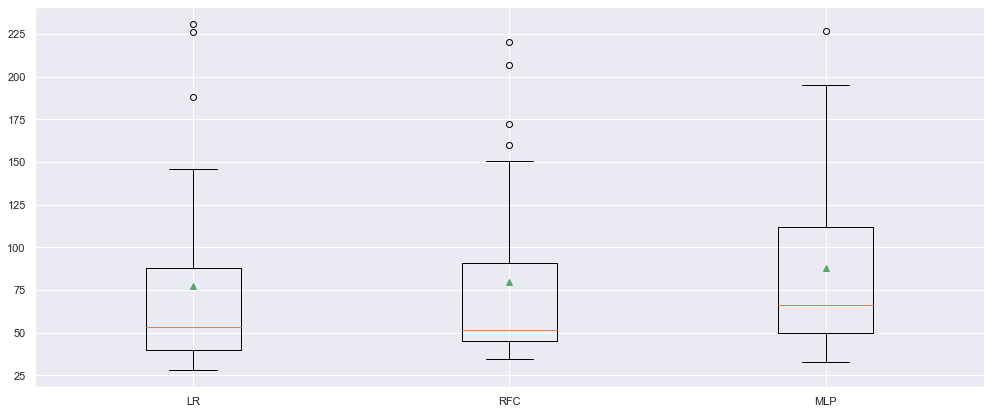

In [16]:
#Diagrama de cajas y bigotes para los 3 modelos con la metrica Recall

sns.set(rc={'figure.figsize':(17,7)})
bpGmean = list()
for i in range(len(scores_3d)):
  rr = scores_3d[i]['test_MAPE']
  bpGmean.append(rr)

plt.boxplot(bpGmean, labels=nombres, showmeans=True)
plt.show()

**Mejor resultado MAPE para LPE**

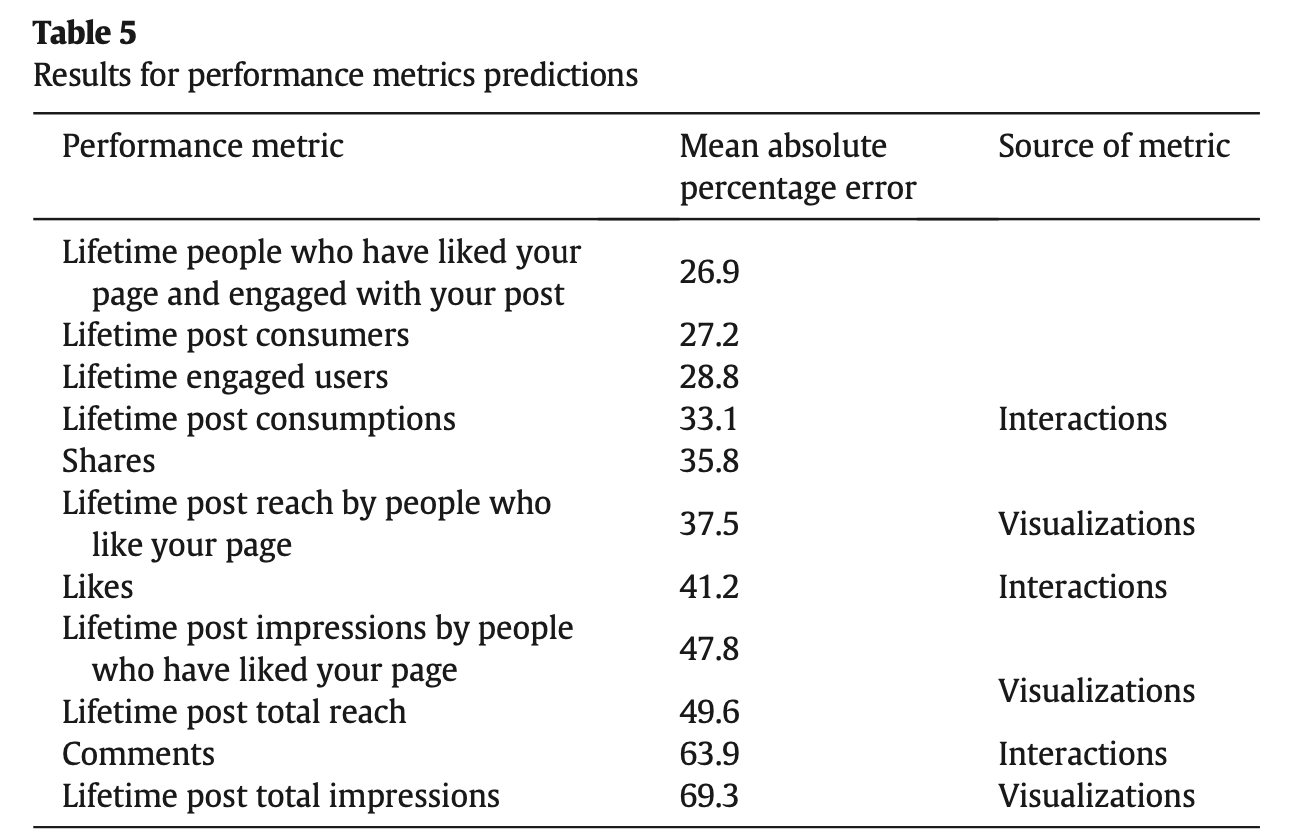

#**Ejercicio-8.**

8. Usando una búsqueda de malla con validación cruzada (GridSearchCV), busca los mejores hiperparámetros para el modelo MLP. Al menos deberás realizar la búsqueda en los hiperparámetros “hidden_layer_sizes”, “alpha” y “learning_rate_init”. Además aplica la validación cruzada con repeticiones (RepeatedKFold). Muestra los mejores hiperparámetros encontrados.

In [37]:
# Mismos modelos de arriba, pero cambiamos las iteraciones máximas

def get_models2():
  modelos2 = list()
  nombres2 = list()

  # LR - Regresión Logística:
  modelos2.append(LogisticRegression(max_iter=30000))
  nombres2.append('LR')

  # RFC - andom Forest / Bosque Aleatorio:
  modelos2.append(RandomForestRegressor())
  nombres2.append('RFC')
  
  # MLP - MLPRegressor / Perceptrón Multicapa:  
  modelos2.append(MLPRegressor(max_iter=900000))
  nombres2.append('MLP')

  return modelos2, nombres2

In [73]:
#Función do_grid_search para realizar la busqueda de los mejores hiperparametros para cada uno de los modelos

def do_grid_search(modela, X, y, cv, dicc_grid, scoring = 'accuracy'):
    
    if(modela==modelos2[0]):
        modeloX = TransformedTargetRegressor(regressor=None, 
                                        func= y_Transform,     # transformación para ajuste del sesgo.
                                        inverse_func=y_antiTransform    # Para regresar los valores "y" en la escala original.
                                        )    



        #Creamos el grid
        grid = GridSearchCV(
            estimator= modeloX, cv=cv,
            param_grid=dicc_grid, scoring=scoring, n_jobs=-1)


        grid.fit(X, y.values.ravel())        
    else:    
        grid_pipe = Pipeline(steps = [
            ('CT', CT),
            ('modela', modela)
            ])

        modeloX = TransformedTargetRegressor(regressor=grid_pipe, 
                                        func= y_Transform,     # transformación para ajuste del sesgo.
                                        inverse_func=y_antiTransform    # Para regresar los valores "y" en la escala original.
                                        )    



        #Creamos el grid
        grid = GridSearchCV(
            estimator= modeloX, cv=cv,
            param_grid=dicc_grid, scoring=scoring, n_jobs=-1)


        grid.fit(X, y.values.ravel())

    #Imprimimos resultados
    print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
    print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
    print('Métrica utilizada:', grid.scoring)

    return grid

In [39]:
modelos2, nombres2 = get_models2() 

#Diccionario con diferente valores de hiperparametros para el modelo RL
dicc_grid = {"regressor__modela__hidden_layer_sizes":[(1,1),(2,2)] ,"regressor__modela__alpha": [0.001, 0.0001, 0.00001], 
             "regressor__modela__learning_rate_init":[0.001, 0.0001, 0.00001]}

Kfold = RepeatedKFold(n_splits=3, n_repeats=3,random_state=0)

grid_MLP = do_grid_search(modelos2[2], X_tv, Y_tv, Kfold, dicc_grid, make_scorer(mi_MAPE))

Mejor valor de exactitud obtenido con la mejor combinación: 108.45614332137276
Mejor combinación de valores encontrados de los hiperparámetros: {'regressor__modela__alpha': 1e-05, 'regressor__modela__hidden_layer_sizes': (1, 1), 'regressor__modela__learning_rate_init': 1e-05}
Métrica utilizada: make_scorer(mi_MAPE)


#**Ejercicio-9.**

9. Con los mejores valores de los hiperparámetros encontrados realiza un análisis de la importancia de los factores. Muestra un diagrama de barras de los resultados e incluye tus conclusiones.

In [44]:
modelo_MLP = MLPRegressor(hidden_layer_sizes = grid_MLP.best_params_.get('regressor__modela__hidden_layer_sizes'), 
                            max_iter = 300000,
                            alpha = grid_MLP.best_params_.get('regressor__modela__alpha'),
                            learning_rate_init = grid_MLP.best_params_.get('regressor__modela__learning_rate_init'))

pipeline = Pipeline(steps=[('ct1',CT),('modelo',modelo_MLP)])
modelo_MLP_C = TransformedTargetRegressor(regressor=pipeline, 
                                    func= y_Transform,     # transformación para ajuste del sesgo.
                                    inverse_func=y_antiTransform    # Para regresar los valores "y" en la escala original.
                                    ) 


modelo_MLP_C.fit(X_tv,np.ravel(Y_tv))

importance = permutation_importance(modelo_MLP_C, X_tv, Y_tv, n_repeats=10)

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00005
Feature: 4, Score: 0.00001
Feature: 5, Score: 0.00001
Feature: 6, Score: 0.00000


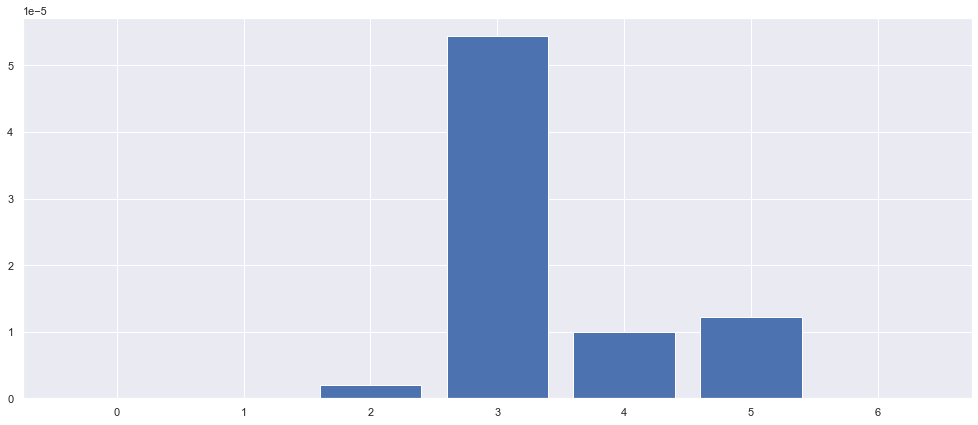

In [45]:
# Una vez inicializado y entrenada la MLP, veamos qué factores considera más importantes:
# visualicemos la importancia de cada métrica, de las cuales sabemos
# cuáles son las más importantes, de acuerdo a como se definieron al inicio:

for i,v in enumerate(importance['importances_mean']):
	print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance['importances_mean']))], importance['importances_mean'])
plt.show()

#**Ejercicio-10.**

In [74]:
dicc_grid = {'regressor__modela__n_estimators':[1,2,3],
             'regressor__modela__criterion':['absolute_error','squared_error'],
             'regressor__modela__max_depth':[1,5,10,20],
             'regressor__modela__min_samples_split':[2,5,10]}

Kfold = RepeatedKFold(n_splits=5, n_repeats=3,random_state=0)

RF_grid = do_grid_search(modelos2[1], X_test, Y_test, Kfold, dicc_grid, make_scorer(mi_MAPE))

Mejor valor de exactitud obtenido con la mejor combinación: 196.36603626101
Mejor combinación de valores encontrados de los hiperparámetros: {'regressor__modela__criterion': 'absolute_error', 'regressor__modela__max_depth': 5, 'regressor__modela__min_samples_split': 5, 'regressor__modela__n_estimators': 1}
Métrica utilizada: make_scorer(mi_MAPE)


In [75]:
modelo_RF = RandomForestRegressor(criterion=RF_grid.best_params_.get('regressor__modela__criterion'),
                            max_depth=RF_grid.best_params_.get('regressor__modela__max_depth'),
                            min_samples_split=RF_grid.best_params_.get('regressor__modela__min_samples_split'),
                            n_estimators=RF_grid.best_params_.get('regressor__modela__n_estimators'))

pipeline = Pipeline(steps=[('ct1',CT),('modelo',modelo_RF)])
modelo_RF_C = TransformedTargetRegressor(regressor=pipeline, 
                                    func= y_Transform,     # transformación para ajuste del sesgo.
                                    inverse_func=y_antiTransform    # Para regresar los valores "y" en la escala original.
                                    ) 


modelo_RF_C.fit(X_test,np.ravel(Y_test))

importance = permutation_importance(modelo_RF_C, X_test, Y_test, n_repeats=10)
                       

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.37668
Feature: 2, Score: 1.20087
Feature: 3, Score: 0.00544
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.21406
Feature: 6, Score: 0.00000


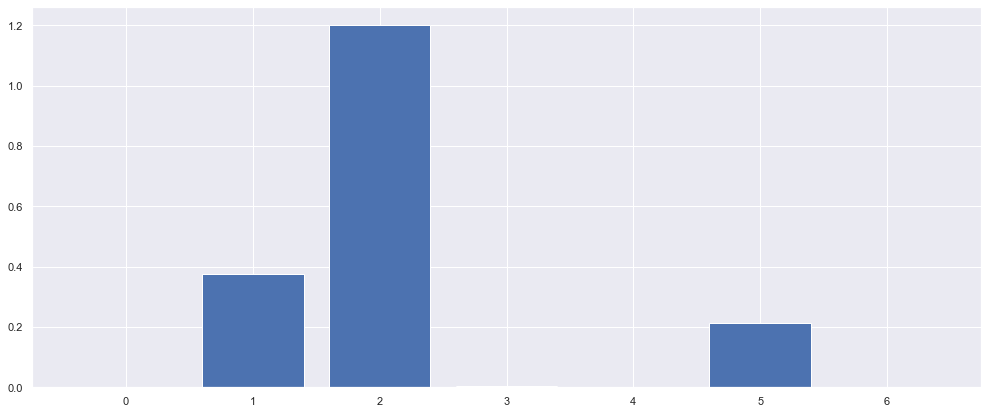

In [76]:
for i,v in enumerate(importance['importances_mean']):
	print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance['importances_mean']))], importance['importances_mean'])
plt.show()

#**Ejercicio-11.**

In [90]:

def do_grid_search2(model, X, y, cv, dicc_grid, scoring):

    #Nuestro pipe, otra vez
    grid_pipe = Pipeline(steps = [
        ('cT', CT),
        ('model', model)
        ])

    #Creamos el grid
    grid = GridSearchCV(
        estimator= grid_pipe, cv=cv,
        param_grid=dicc_grid, scoring=scoring)

    #Le entramos los valores. Recuerda que el .ravel() es para evitar un warning
    grid.fit(X, y.values.ravel())

    #Imprimimos resultados
    print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
    print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
    print('Métrica utilizada:', grid.scoring)
    
    return grid



In [ ]:


Kfold = RepeatedKFold(n_splits=5, n_repeats=3,random_state=0)

dicc_grid3 = {'regressor__modela__C':[0.01,0.1,1,10,100],
             'regressor__modela__solver':['newton-cg','lbfgs','liblinear','sag','saga'],
             'regressor__modela__class_weight':['balanced'],
             'regressor__modela__penalty':['l2','elasticnet']
             }

dicc_grid4 = {'model__C':[0.1,1,10,100],
             'model__solver':['lbfgs','liblinear','sag','saga'],
             'model__class_weight':['balanced'],
             'model__penalty':['l2']
             }
  

# 5.A Gridsearch con regresión logística y scorer de f1score
LR_grid = do_grid_search2(modelos2[0], X_test, Y_test, Kfold, dicc_grid4, make_scorer(mi_MAPE))

Feature: 0, Score: 0.45700
Feature: 1, Score: 0.29300
Feature: 2, Score: 0.36200
Feature: 3, Score: 0.43100
Feature: 4, Score: 0.49800
Feature: 5, Score: 0.37400
Feature: 6, Score: 0.03300
Feature: 7, Score: 0.05800
Feature: 8, Score: 0.06800


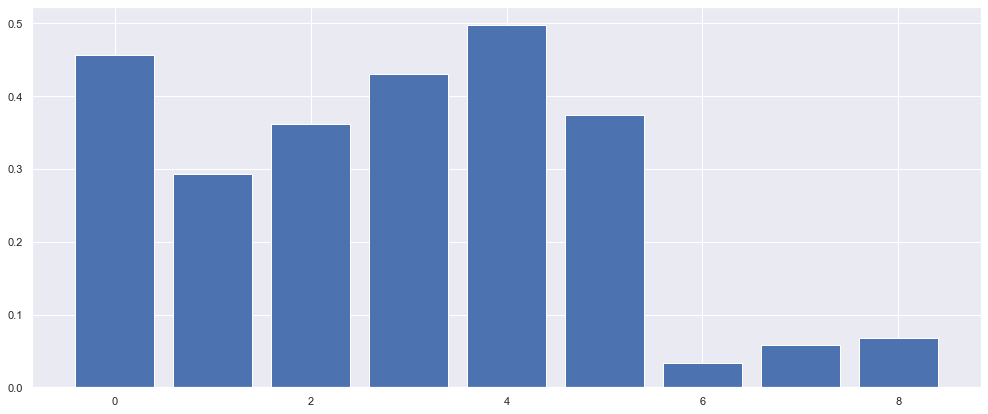

In [106]:
modelo_LR = LogisticRegression(penalty=LR_grid.best_params_.get('model__penalty'), 
                            max_iter=30000,
                            C=LR_grid.best_params_.get('model__C'),
                            solver=LR_grid.best_params_.get('model__solver'),
                            class_weight=LR_grid.best_params_.get('model__class_weight'))

#pipeline = Pipeline(steps=[('model',modelo_LR)])
#modelo_LR_C = TransformedTargetRegressor(regressor=pipeline, 
#                                    func= y_Transform,     # transformación para ajuste del sesgo.
#                                    inverse_func=y_antiTransform    # Para regresar los valores "y" en la escala original.
#                                    ) 

Xct = CT.fit(X_test)
Xxt = Xct.transform(X_test)

modelo_LR.fit(Xxt, np.ravel(Y_test))

importance = permutation_importance(modelo_LR, Xxt, Y_test, n_repeats=10)

for i,v in enumerate(importance['importances_mean']):
	print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance['importances_mean']))], importance['importances_mean'])
plt.show()

#**Ejercicio-12.**

In [ ]:
None

###**Fin de la Actividad de la semana 7.**